In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
import idx2numpy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
x_train = idx2numpy.convert_from_file(r"C:\Users\Mohamed Abdelaziz\Desktop\ML_Task_1\task1_data\data\train-images.idx3-ubyte")
x_test  = idx2numpy.convert_from_file(r"C:\Users\Mohamed Abdelaziz\Desktop\ML_Task_1\task1_data\data\t10k-images.idx3-ubyte")

y_train = pd.DataFrame(idx2numpy.convert_from_file(r"C:\Users\Mohamed Abdelaziz\Desktop\ML_Task_1\task1_data\data\train-labels.idx1-ubyte"),columns = ["label"])
y_test  = pd.DataFrame(idx2numpy.convert_from_file(r"C:\Users\Mohamed Abdelaziz\Desktop\ML_Task_1\task1_data\data\t10k-labels.idx1-ubyte"),columns = ["labels"])

print(x_train.shape[0])
print(x_train.shape[1])
print(x_train.shape[2])

x_train = pd.DataFrame(x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test = pd.DataFrame(x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_train_norm = x_train / 255.0

data = {
    "x_train" : x_train,
    "y_train" : y_train,
    "x_test" : x_test,
    "y_test" : y_test
}
print(x_train.shape)


60000
28
28
(60000, 784)


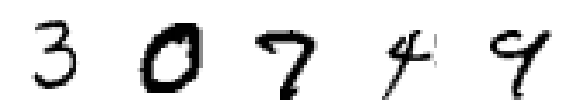

In [3]:

examples = x_train[50:100].to_numpy()
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image in zip(axes, examples):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [4]:
def Binary_Classification(data, target_num):
    y_train = (data["y_train"] == target_num )
    y_test = (data["y_test"] == target_num)
    data = {
        'x_train' : data["x_train"],
        'y_train' : y_train,
        'x_test'  : data['x_test'],
        'y_test' : y_test
    }

    return data 


In [5]:
## HERE WE CHOOSE THE DIGIT TO BE CLASSIFIED
new_data = Binary_Classification(data, 1)

## MODEL FIT
model = LogisticRegression(max_iter = 100 )
model.fit(new_data["x_train"],new_data["y_train"])
train_predictions = model.predict(new_data["x_train"]).reshape(-1,1)
test_predictions = model.predict(new_data["x_test"]).reshape(-1,1)

predictions = {
    'train_predictions':train_predictions,
    'test_predictions':test_predictions
}

print("train accuracy is = ", np.mean(new_data["y_train"] == train_predictions))
print("test accuracy is = ", np.mean(new_data["y_test"] == test_predictions))

y_test = np.array(new_data["y_test"])


C:\Users\Mohamed Abdelaziz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Mohamed Abdelaziz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy is =  label    0.993733
dtype: float64
test accuracy is =  labels    0.9933
dtype: float64


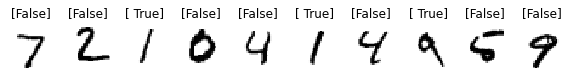

In [6]:
## PLOT TESTING DATA

x_test = new_data["x_test"].to_numpy()
predictions = predictions["test_predictions"]
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image , prediction in zip(axes, x_test , predictions):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"{prediction}")
plt.show()

tp =8825  fn = 27  fp = 40  tn=1108
precision is : 0.9954878736604625 , recall is = 0.9969498418436512 , f1score = 0.9962183213862391


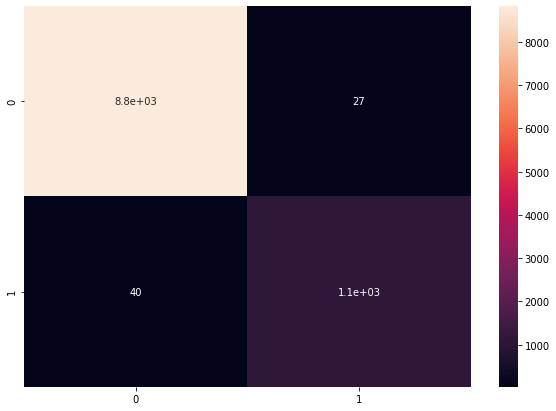

In [7]:
# predicted values
# predicted = predictions["test_predictions"].to_numpy()
predicted=pd.DataFrame(test_predictions, columns=['labels']) 
# print (predicted)

actual = new_data["y_test"]

# confusion matrix
matrix = confusion_matrix(predicted,actual)
tp, fn, fp, tn = matrix[0][0], matrix[0][1],matrix[1][0], matrix[1][1]
print(f"tp ={tp}  fn = {fn}  fp = {fp}  tn={tn}")
precision =  tp/(tp+fp)
recall = tp/(tp+fn)
f1score = 2/((1/recall)+(1/precision))
print(f"precision is : {precision} , recall is = {recall } , f1score = {f1score}")
df_cm = pd.DataFrame(matrix, index = [i for i in range(matrix.shape[1])],
                          columns =[i for i in range(matrix.shape[0])] )
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
            
plt.show()
    

In [8]:
## MULTICLASS CLASSIFICATION

x_train = idx2numpy.convert_from_file(r"C:\Users\Mohamed Abdelaziz\Desktop\ML_Task_1\task1_data\data\train-images.idx3-ubyte")
x_test  = idx2numpy.convert_from_file(r"C:\Users\Mohamed Abdelaziz\Desktop\ML_Task_1\task1_data\data\t10k-images.idx3-ubyte")

y_train = pd.DataFrame(idx2numpy.convert_from_file(r"C:\Users\Mohamed Abdelaziz\Desktop\ML_Task_1\task1_data\data\train-labels.idx1-ubyte"),columns = ["label"])
y_test  = pd.DataFrame(idx2numpy.convert_from_file(r"C:\Users\Mohamed Abdelaziz\Desktop\ML_Task_1\task1_data\data\t10k-labels.idx1-ubyte"),columns = ["labels"])


x_train = pd.DataFrame(x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test = pd.DataFrame(x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_train_norm = x_train / 255.0

data = {
    "x_train" : x_train_norm,
    "y_train" : y_train,
    "x_test" : x_test,
    "y_test" : y_test
}




In [9]:

# x_train_norm = data["x_train"] / 255.0
# data = {
#     "x_train" : x_train_norm,
#     "y_train" : data["y_train"],
#     "x_test"  : data["x_test"],
#     "y_test"  : data["y_test"]
# }



In [10]:
model = LogisticRegression(max_iter = 100 )
model.fit(data["x_train"],data["y_train"])
train_predictions = model.predict(data["x_train"]).reshape(-1,1)
test_predictions  = model.predict(data["x_test"]).reshape(-1,1)
predictions = {
    "train_predictions" : train_predictions,
    "test_predictions" : test_predictions
}
print("train accuracy is = ", np.mean(data["y_train"] == train_predictions))
print("test accuracy is = ", np.mean(data["y_test"] == test_predictions))


C:\Users\Mohamed Abdelaziz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Mohamed Abdelaziz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy is =  label    0.935067
dtype: float64
test accuracy is =  labels    0.8699
dtype: float64


In [11]:
from sklearn import metrics
predicted=pd.DataFrame(test_predictions) 
cm = metrics.confusion_matrix(data["y_test"], predicted)
print(cm)

[[ 968    0    0    2    0    0    4    1    5    0]
 [   0 1025    2    4    0    0    3    2   99    0]
 [  11    4  872   22    5    0   16    3   95    4]
 [   5    0    9  916    1    1    3    7   62    6]
 [   3    0    5    3  874    0   12    1   35   49]
 [  17    1    1   81    7  410   18    3  338   16]
 [  13    2    3    3    5    1  918    1   12    0]
 [   4    4   20   17    8    0    0  839   28  108]
 [   6    1    2   12    5    1    5    1  939    2]
 [  10    1    0    8   12    0    0    0   40  938]]


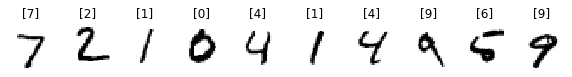

In [12]:
x_test = data["x_test"].to_numpy()
predictions = predictions["test_predictions"]
# predictions = pd.DataFrame(test_predictions, columns=['labels']) 
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image , prediction in zip(axes, x_test , predictions):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"{prediction}")
plt.show()

tp =968  fn = 0  fp = 0  tn=1025
precision is : 1.0 , recall is = 1.0 , f1score = 1.0


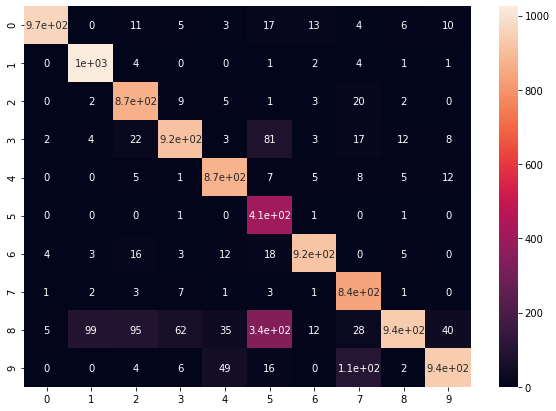

In [13]:
# predicted values
# predicted = predictions["test_predictions"].to_numpy()
# predictions = predictions["test_predictions"]
predicted=pd.DataFrame(test_predictions) 
# print (predicted)

actual = data["y_test"]

# confusion matrix
matrix = confusion_matrix(predicted,actual)
tp, fn, fp, tn = matrix[0][0], matrix[0][1],matrix[1][0], matrix[1][1]
print(f"tp ={tp}  fn = {fn}  fp = {fp}  tn={tn}")
precision =  tp/(tp+fp)
recall = tp/(tp+fn)
f1score = 2/((1/recall)+(1/precision))
print(f"precision is : {precision} , recall is = {recall } , f1score = {f1score}")
df_cm = pd.DataFrame(matrix, index = [i for i in range(matrix.shape[1])],
                          columns =[i for i in range(matrix.shape[0])] )
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
            
plt.show()